In [ ]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

# Define ticker and date range
ticker = "^GSPC"
start_date = "2025-04-09"
end_date = "2025-04-10"  # next day to ensure full day capture
output_file = "sp500_insider_data.csv"

try:
    # Download 1-minute interval data
    df = yf.download(
        ticker, 
        start=start_date, 
        end=end_date, 
        interval="1m", 
        progress=False)
    
    if not df.empty:
        df.reset_index(inplace=True)
        df.columns.name = None
        df = df[["Datetime", "Open", "High", "Low", "Close", "Volume"]]

        df.to_csv(output_file, mode="w", index=False)
        first_chunk = False
        print(f"✅ Saved {len(df)} rows.")
    else:
        print("⚠️ No data returned for this chunk.")

except Exception as e:
    print(f"❌ Error downloading: {e}")




✅ Saved 390 rows.


In [8]:
data = pd.read_csv("sp500_insider_data.csv", index_col=0, parse_dates=True)
data = data.iloc[1:]  # Drop junk row

data.to_csv("sp500_insider_data.csv")

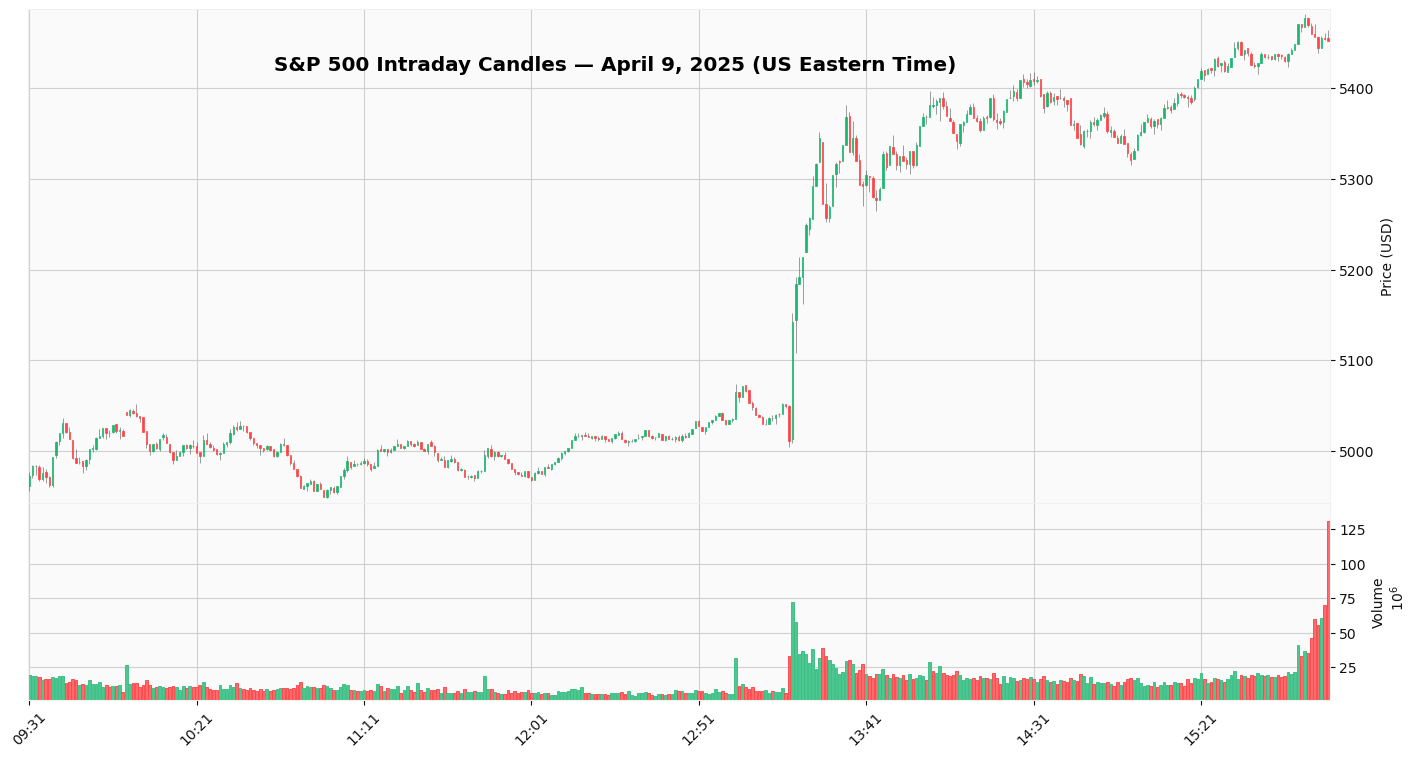

In [12]:
import pandas as pd
import mplfinance as mpf

# Load CSV with datetime index
data = pd.read_csv("sp500_insider_data.csv", index_col="Datetime", parse_dates=True)

# Convert timezone from UTC to US/Eastern
data.index = data.index.tz_convert("US/Eastern")

# Drop zero-volume rows
data = data[data["Volume"] > 0]

# Plot candlestick chart
mpf.plot(
    data,
    type='candle',
    volume=True,
    style='yahoo',
    title='S&P 500 Intraday Candles — April 9, 2025 (US Eastern Time)',
    ylabel='Price (USD)',
    ylabel_lower='Volume',
    figsize=(15, 8),
    tight_layout=True
)
